In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *

/home/bluefog/miniconda3/envs/bf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
n=5
a=0.5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

A的第二大特征值: 0.6452753258452748
A的beta: 0.8816437907808328
A的spectral gap: 0.11835620921916723
A的kappa: 1.834860435804879
S_A是: 60.71993438481916 

1.6066e+00, 1.5299e+01


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s, accuracy=72.2200000000%, epoch=4, loss=1.9495586872]

Training Progress: 100%|██████████| 500/500 [00:10<00:00, 45.51it/s, accuracy=95.4300000000%, epoch=500, loss=0.2193904489]


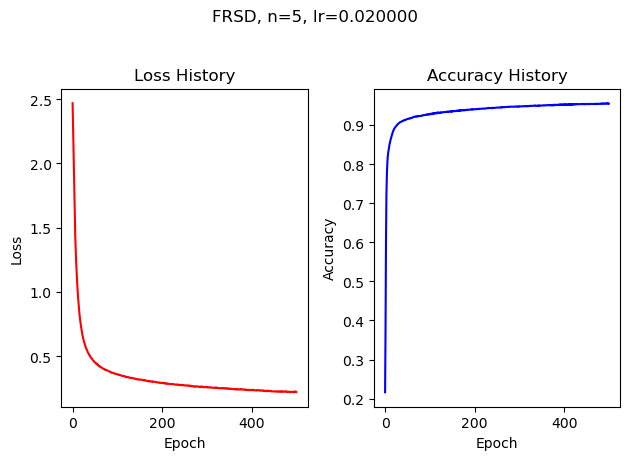

In [19]:
l2,a2=train_FRSD(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=500,lr=(0.1/n),beta=1,d=784,X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)